# Gradient Descent — Intuition

Goal: Build an intuitive understanding of what a gradient is
and why gradient descent works.

In [2]:
import numpy as np
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [3]:
def f(x):
    return x**2

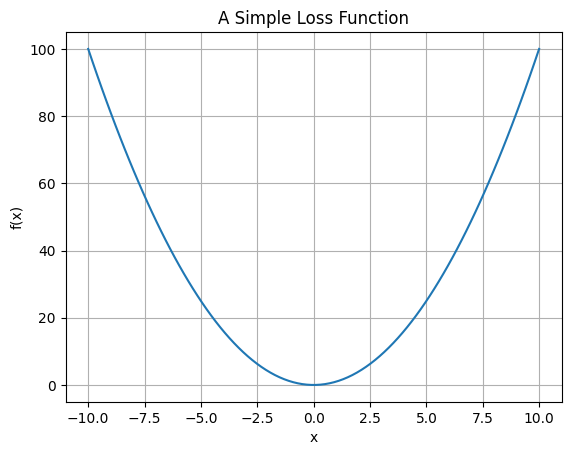

In [4]:
x = np.linspace(-10, 10, 100)
y = f(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('A Simple Loss Function')
plt.grid()

In [5]:
def gradient(x):
    return 2 * x



In [6]:
xs = [-6, -2, 0, 2, 6]

for x in xs:
    print(f"x = {x}, gradient = {gradient(x)}")


x = -6, gradient = -12
x = -2, gradient = -4
x = 0, gradient = 0
x = 2, gradient = 4
x = 6, gradient = 12


In [7]:
x = 8.0
print("Starting x:", x)
print("f(x):", f(x))
print("gradient:", gradient(x))


Starting x: 8.0
f(x): 64.0
gradient: 16.0


In [8]:
learning_rate = 0.1

x = x - learning_rate * gradient(x)

print("New x:", x)
print("New f(x):", f(x))


New x: 6.4
New f(x): 40.96000000000001


In [9]:
x = 8.0
learning_rate = 0.1

for step in range(10):
    x = x - learning_rate * gradient(x)
    print(f"Step {step+1}: x = {x:.4f}, f(x) = {f(x):.4f}")


Step 1: x = 6.4000, f(x) = 40.9600
Step 2: x = 5.1200, f(x) = 26.2144
Step 3: x = 4.0960, f(x) = 16.7772
Step 4: x = 3.2768, f(x) = 10.7374
Step 5: x = 2.6214, f(x) = 6.8719
Step 6: x = 2.0972, f(x) = 4.3980
Step 7: x = 1.6777, f(x) = 2.8147
Step 8: x = 1.3422, f(x) = 1.8014
Step 9: x = 1.0737, f(x) = 1.1529
Step 10: x = 0.8590, f(x) = 0.7379


In [10]:
x = 8.0
learning_rate = 0.01

for step in range(10):
    x = x - learning_rate * gradient(x)
    print(f"Step {step+1}: x = {x:.4f}, f(x) = {f(x):.4f}")


Step 1: x = 7.8400, f(x) = 61.4656
Step 2: x = 7.6832, f(x) = 59.0316
Step 3: x = 7.5295, f(x) = 56.6939
Step 4: x = 7.3789, f(x) = 54.4488
Step 5: x = 7.2314, f(x) = 52.2927
Step 6: x = 7.0867, f(x) = 50.2219
Step 7: x = 6.9450, f(x) = 48.2331
Step 8: x = 6.8061, f(x) = 46.3231
Step 9: x = 6.6700, f(x) = 44.4887
Step 10: x = 6.5366, f(x) = 42.7269


In [11]:
x = 8.0
learning_rate = 1.0

for step in range(10):
    x = x - learning_rate * gradient(x)
    print(f"Step {step+1}: x = {x:.4f}, f(x) = {f(x):.4f}")


Step 1: x = -8.0000, f(x) = 64.0000
Step 2: x = 8.0000, f(x) = 64.0000
Step 3: x = -8.0000, f(x) = 64.0000
Step 4: x = 8.0000, f(x) = 64.0000
Step 5: x = -8.0000, f(x) = 64.0000
Step 6: x = 8.0000, f(x) = 64.0000
Step 7: x = -8.0000, f(x) = 64.0000
Step 8: x = 8.0000, f(x) = 64.0000
Step 9: x = -8.0000, f(x) = 64.0000
Step 10: x = 8.0000, f(x) = 64.0000


In [12]:
def run_gd(x0, learning_rate, steps=12):
    x = x0
    xs = [x]
    ys = [f(x)]
    for _ in range(steps):
        x = x - learning_rate * gradient(x)
        xs.append(x)
        ys.append(f(x))
    return np.array(xs), np.array(ys)


In [13]:
x0 = 8.0
steps = 12

xs_slow, ys_slow = run_gd(x0, learning_rate=0.01, steps=steps)
xs_good, ys_good = run_gd(x0, learning_rate=0.1, steps=steps)
xs_osc,  ys_osc  = run_gd(x0, learning_rate=1.0, steps=steps)

xs_slow, xs_good, xs_osc


(array([8.        , 7.84      , 7.6832    , 7.529536  , 7.37894528,
        7.23136637, 7.08673905, 6.94500427, 6.80610418, 6.6699821 ,
        6.53658246, 6.40585081, 6.27773379]),
 array([8.        , 6.4       , 5.12      , 4.096     , 3.2768    ,
        2.62144   , 2.097152  , 1.6777216 , 1.34217728, 1.07374182,
        0.85899346, 0.68719477, 0.54975581]),
 array([ 8., -8.,  8., -8.,  8., -8.,  8., -8.,  8., -8.,  8., -8.,  8.]))

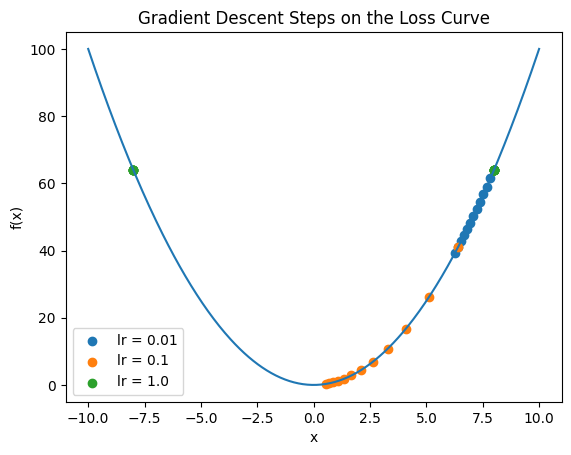

In [14]:
x_curve = np.linspace(-10, 10, 400)
y_curve = f(x_curve)

plt.figure()
plt.plot(x_curve, y_curve)
plt.scatter(xs_slow, ys_slow, label="lr = 0.01")
plt.scatter(xs_good, ys_good, label="lr = 0.1")
plt.scatter(xs_osc, ys_osc, label="lr = 1.0")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent Steps on the Loss Curve")
plt.legend()
plt.show()


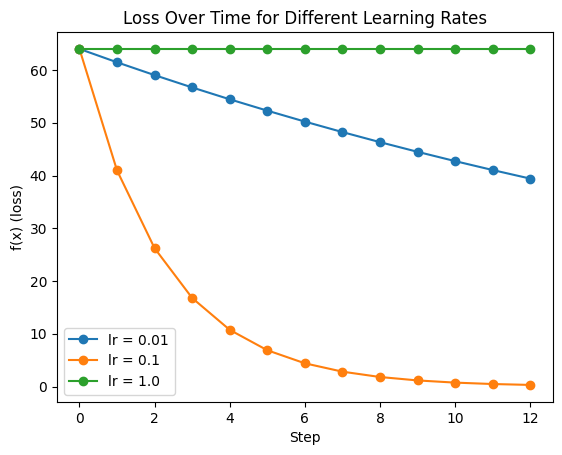

In [15]:
plt.figure()
plt.plot(ys_slow, marker="o", label="lr = 0.01")
plt.plot(ys_good, marker="o", label="lr = 0.1")
plt.plot(ys_osc,  marker="o", label="lr = 1.0")

plt.xlabel("Step")
plt.ylabel("f(x) (loss)")
plt.title("Loss Over Time for Different Learning Rates")
plt.legend()
plt.show()


In [16]:
def plot_with_gradients(x_points, title):
    x_curve = np.linspace(-10, 10, 400)
    y_curve = f(x_curve)

    plt.figure()
    plt.plot(x_curve, y_curve)
    plt.scatter(x_points, f(np.array(x_points)))

    # Draw a tangent arrow at each point showing uphill direction (gradient)
    for x0 in x_points:
        y0 = f(x0)
        m = gradient(x0)  # slope at x0

        # Create a small step in x to draw an arrow
        dx = 0.8
        dy = m * dx  # rise = slope * run

        # Arrow points in the +x direction; if slope is negative, arrow points "down"
        # We'll flip arrow direction so it always points "uphill"
        if dy < 0:
            dx = -dx
            dy = -dy

        plt.arrow(
            x0, y0, dx, dy,
            head_width=2.5, head_length=1.0,
            length_includes_head=True
        )

    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title(title)
    plt.ylim(0, 110)
    plt.show()


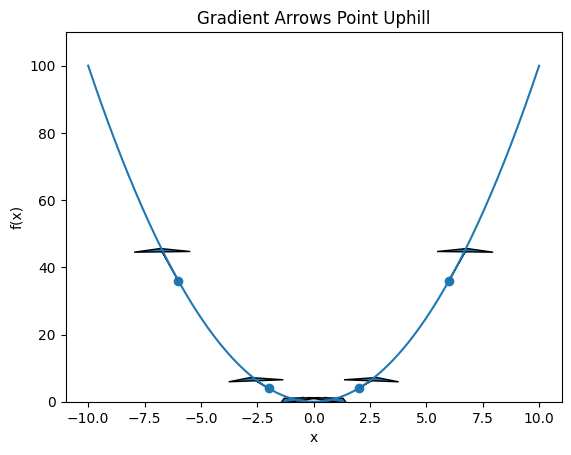

In [17]:
points = [-6, -2, -0.5, 0.5, 2, 6]
plot_with_gradients(points, "Gradient Arrows Point Uphill")
